In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset disponível em: https://www.kaggle.com/zynicide/wine-reviews

In [2]:
df = pd.read_csv('data/winemag-data-130k-v2.csv')
df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
# Excluindo a primeira coluna

df.drop(df.columns[0], axis =1, inplace = True)
df.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [5]:
# Paises com mais avaliações.

df['country'].value_counts()[0:10]

US           54504
France       22093
Italy        19540
Spain         6645
Portugal      5691
Chile         4472
Argentina     3800
Austria       3345
Australia     2329
Germany       2165
Name: country, dtype: int64

In [6]:
# Transformando os 10+ em um novo DF

df_top10 = pd.DataFrame(df['country'].value_counts()[0:10])

# criando indice
df_top10['Index'] = list(range(0,10))

# Criando coluna com nome dos Pais
df_top10['Country'] = df_top10.index.values

# Modificando indice do DataFrame
df_top10.set_index('Index', inplace=True)

# renomeando colunas
df_top10.columns = ['Quantity', 'Country']

df_top10


,Quantity,Country
Index,,
0,54504,US
1,22093,France
2,19540,Italy
3,6645,Spain
4,5691,Portugal
5,4472,Chile
6,3800,Argentina
7,3345,Austria
8,2329,Australia


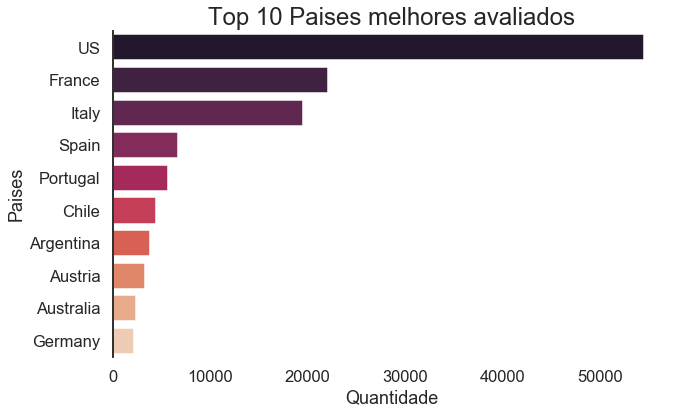

In [31]:
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, ax1 = plt.subplots(figsize=(10, 6), sharex=True)

plt.title('Top 10 Paises melhores avaliados', fontsize=24)

# Generate some sequential data
sns.barplot(x='Quantity', y='Country', palette="rocket", data = df_top10)
ax1.set_ylabel("Paises")
ax1.set_xlabel("Quantidade")

# Finalize the plot
sns.despine(bottom=True)




In [38]:
# Top 10 Viniculas 
df_top10_viniculas = pd.DataFrame(df['winery'].value_counts()[0:10])

# Resetando index
df_top10_viniculas.reset_index(inplace=True)

# Mudando nome das colunas

df_top10_viniculas.columns = ['Vinicula', 'Quantidade']

df_top10_viniculas

,Vinicula,Quantidade
0,Wines & Winemakers,222
1,Testarossa,218
2,DFJ Vinhos,215
3,Williams Selyem,211
4,Louis Latour,199
5,Georges Duboeuf,196
6,Chateau Ste. Michelle,194
7,Concha y Toro,164
8,Columbia Crest,159
9,Kendall-Jackson,130


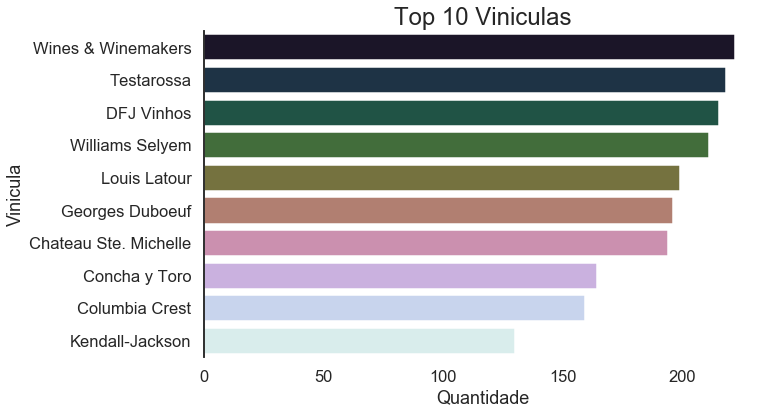

In [34]:
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, ax1 = plt.subplots(figsize=(10, 6), sharex=True)

plt.title('Top 10 Viniculas', fontsize=24)

# Generate some sequential data
sns.barplot(x='Quantidade', y='Vinicula', palette="cubehelix", data = df_top10_viniculas)
ax1.set_ylabel("Vinicula")
ax1.set_xlabel("Quantidade")

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

### Top 10 revisores

In [36]:
df_top10_avaliadores = df['taster_name'].value_counts()[0:10].reset_index()[0:10]
df_top10_avaliadores.columns = ['Avaliador','Quantidade']
df_top10_avaliadores

,Avaliador,Quantidade
0,Roger Voss,25514
1,Michael Schachner,15134
2,Kerin O’Keefe,10776
3,Virginie Boone,9537
4,Paul Gregutt,9532
5,Matt Kettmann,6332
6,Joe Czerwinski,5147
7,Sean P. Sullivan,4966
8,Anna Lee C. Iijima,4415
9,Jim Gordon,4177


### Pontuação dos vinhos das top 10 viniculas

In [41]:
df_pontuacao = df[['winery', 'points']]

# Filtrando somente pelas top 10.

#df_pontuacao = df_pontuacao[df_pontuacao['winery'].isin(df_top10_viniculas['Vinicula'])]
df_pontuacao




df_pontuacao = df_pontuacao[df_pontuacao['winery'].isin(df_top10_viniculas['Vinicula'])]


,winery,points
145,Testarossa,91
235,Testarossa,85
353,Louis Latour,96
363,Louis Latour,95
525,Testarossa,91
...,...,...
129639,Columbia Crest,90
129640,Concha y Toro,90
129701,Chateau Ste. Michelle,87
129817,Louis Latour,89


### Pontuação das TOP 10

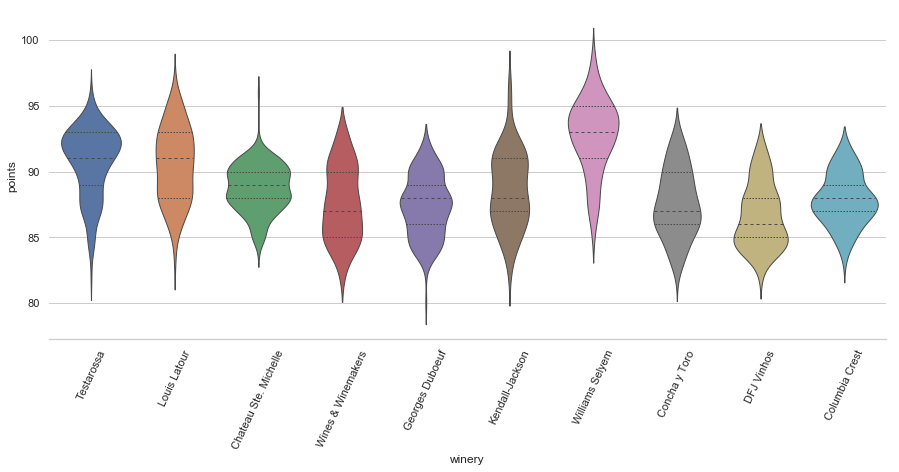

In [47]:
sns.set_theme(style="whitegrid")
# Set up the matplotlib figure
f, ax1 = plt.subplots(figsize=(15, 6), sharex=True)

sns.violinplot(data=df_pontuacao, x="winery", y="points",
               split=True, inner="quart", linewidth=1)
plt.xticks(rotation=65)
sns.despine(left=True)

In [48]:
# Divisao dos viinhos Pinot Noir por pontuacao

x = df[df['variety']=='Pinot Noir'].groupby('points').count()['country'].reset_index()

df_tipos = x

# Divisao dos viinhos Chardonnay por pontuacao
x = df[df['variety']=='Chardonnay'].groupby('points').count()['country'].reset_index()

df_tipos = pd.concat([df_tipos,x], axis=1)

# Divisao dos viinhos Cabernet Sauvignon  por pontuacao
x = df[df['variety']=='Cabernet Sauvignon'].groupby('points').count()['country'].reset_index()

df_tipos = pd.concat([df_tipos,x], axis=1)

# Divisao dos viinhos Red Blend  por pontuacao
x = df[df['variety']=='Red Blend'].groupby('points').count()['country'].reset_index()

df_tipos = pd.concat([df_tipos,x], axis=1)

# Divisao dos vinhos Bordeaux-style Red Blend  por pontuacao
x = df[df['variety']=='Bordeaux-style Red Blend'].groupby('points').count()['country'].reset_index()

df_tipos = pd.concat([df_tipos,x], axis=1)

df_tipos

,points,country,points,country,points,country,points,country,points,country
0,80.0,16.0,80,46,80,41,80.0,25.0,80,3
1,81.0,39.0,81,86,81,82,81.0,56.0,81,23
2,82.0,150.0,82,222,82,176,82.0,114.0,82,45
3,83.0,197.0,83,350,83,246,83.0,184.0,83,127
4,84.0,452.0,84,733,84,507,84.0,350.0,84,310
5,85.0,684.0,85,954,85,687,85.0,512.0,85,450
6,86.0,969.0,86,1125,86,859,86.0,832.0,86,523
7,87.0,1328.0,87,1467,87,1128,87.0,1325.0,87,710
8,88.0,1434.0,88,1392,88,1064,88.0,1351.0,88,849
9,89.0,1111.0,89,859,89,697,89.0,1053.0,89,652


In [49]:
# Renomeando as colunas

df_tipos.columns = ['pontos1','Pinot Noir','pontos2','Chardonnay','pontos3',
                    'Cabernet Sauvignon','pontos4','Red Blend','pontos5',
                    'Bordeaux-style Red Blend']

df_tipos

,pontos1,Pinot Noir,pontos2,Chardonnay,pontos3,Cabernet Sauvignon,pontos4,Red Blend,pontos5,Bordeaux-style Red Blend
0,80.0,16.0,80,46,80,41,80.0,25.0,80,3
1,81.0,39.0,81,86,81,82,81.0,56.0,81,23
2,82.0,150.0,82,222,82,176,82.0,114.0,82,45
3,83.0,197.0,83,350,83,246,83.0,184.0,83,127
4,84.0,452.0,84,733,84,507,84.0,350.0,84,310
5,85.0,684.0,85,954,85,687,85.0,512.0,85,450
6,86.0,969.0,86,1125,86,859,86.0,832.0,86,523
7,87.0,1328.0,87,1467,87,1128,87.0,1325.0,87,710
8,88.0,1434.0,88,1392,88,1064,88.0,1351.0,88,849
9,89.0,1111.0,89,859,89,697,89.0,1053.0,89,652


In [50]:
df_tipos.set_index('pontos2',drop=True,inplace=True)

In [51]:
df_tipos.drop(labels=['pontos1','pontos3','pontos4','pontos5'], axis=1, inplace=True)

df_tipos

,Pinot Noir,Chardonnay,Cabernet Sauvignon,Red Blend,Bordeaux-style Red Blend
pontos2,,,,,
80,16.0,46,41,25.0,3
81,39.0,86,82,56.0,23
82,150.0,222,176,114.0,45
83,197.0,350,246,184.0,127
84,452.0,733,507,350.0,310
85,684.0,954,687,512.0,450
86,969.0,1125,859,832.0,523
87,1328.0,1467,1128,1325.0,710
88,1434.0,1392,1064,1351.0,849


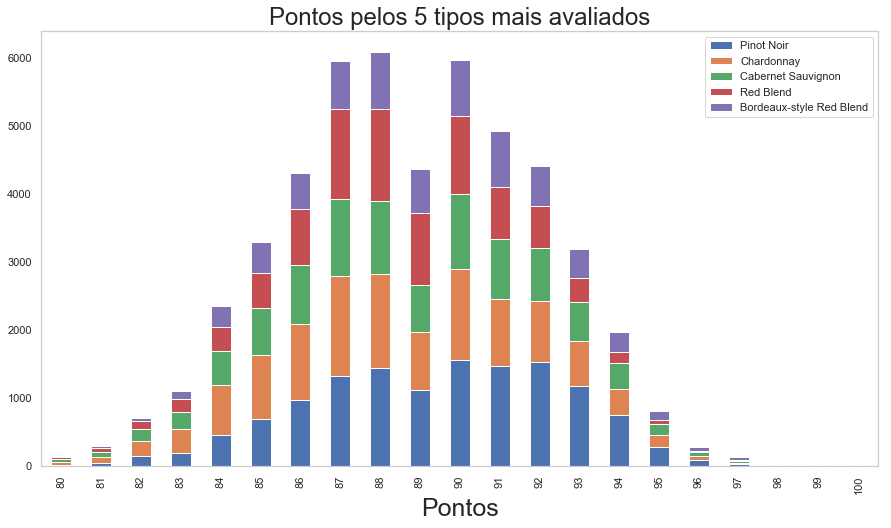

In [52]:
df_tipos.plot.bar(stacked=True, figsize=(15,8), grid=False)

plt.title('Pontos pelos 5 tipos mais avaliados', fontsize=24)
plt.xlabel('Pontos',fontsize=25)
plt.show()